In [96]:
%pylab inline
import os

POPS = [   "ACB", "ASW", "ESN", "GWD", "LWK", "MSL", "YRI", \
           "CLM", "MXL", "PEL", "PUR", \
           "CDX", "CHB", "CHS", "JPT", "KHV", \
           "CEU", "FIN", "GBR", "IBS", "TSI", \
           "BEB", "GIH", "ITU", "PJL", "STU"]

# Load config information
#OUTDIR = os.environ["1KGOUTDIR"]
OUTDIR="/storage/mgymrek/1000Genomes/qc"

Populating the interactive namespace from numpy and matplotlib


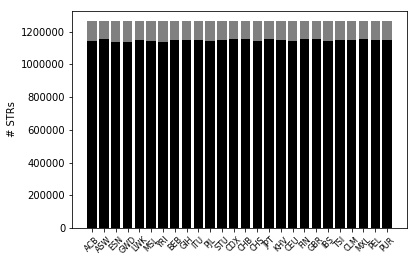

In [93]:
# Num calls by period

numcalls = []
numpass = []
for pop in POPS:
    fname = os.path.join(OUTDIR, pop, "%s.stats.txt"%pop)
    nc = 0
    npa = 0
    if os.path.exists(fname):
        nc, npa = [int(item.strip()) for item in open(fname, "r").readlines()]
    numcalls.append(nc)
    numpass.append(npa)

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.set_yscale("log")
ax.bar(range(len(POPS)), numcalls, color="gray")
ax.bar(range(len(POPS)), numpass, color="black");
ax.set_xlabel("")
ax.set_xticks(range(len(POPS)))
ax.set_xticklabels(POPS, rotation=45, size=8)
ax.set_ylabel("# STRs");

,period,numtrios,num_consistent,num_inf_consistent,num_inconsistent,mi_all,mi_inf
0,1,247821736,241248833,148877585,6572903,0.973477,0.957717
1,2,88559027,85398443,37984253,3160584,0.964311,0.923184
2,3,78401249,77999988,6776094,401261,0.994882,0.944093
3,4,199269224,198276937,16757153,992287,0.995020,0.944095
4,5,54256959,53988499,4121548,268460,0.995052,0.938847
5,6,14129824,14068171,934447,61653,0.995637,0.938106


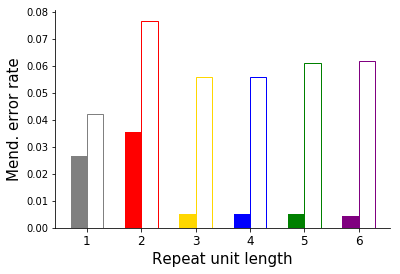

In [22]:
# MI by period combined

import pandas as pd
mend = pd.read_csv(os.path.join(OUTDIR, "mend.txt"), sep="\t")

PERCOLORS = ["gray","red","gold","blue","green","purple"]
w=0.3
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(range(mend.shape[0]), 1-mend["mi_all"], color=PERCOLORS, width=w)
ax.bar([item+w for item in range(mend.shape[0])], 1-mend["mi_inf"], color="white", edgecolor=PERCOLORS, width=w)
ax.set_xticks([item+w/2 for item in range(mend.shape[0])])
ax.set_xticklabels(range(1, 7), size=12)
ax.set_ylabel("Mend. error rate", size=15)
ax.set_xlabel("Repeat unit length", size=15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
mend

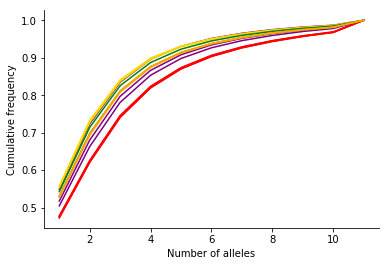

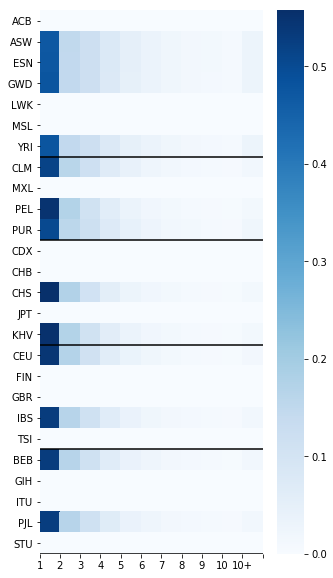

In [136]:
# Num common alleles by pop - TODO

import seaborn as sns
MAXNUMALLELES=10

countmatrix = np.zeros(((len(POPS)), MAXNUMALLELES+1))

cumsums = []

for pop in POPS:
    fname = os.path.join(OUTDIR, pop, "%s.alleles.txt"%pop)
    if os.path.exists(fname):
        data = pd.read_csv(fname, sep="\t", names=["numalleles","count"])
        data = data[(data["numalleles"]>=1) ]
        data["freq"] = data["count"]/np.sum(data["count"])
        freqs = list(data[data["numalleles"]<=MAXNUMALLELES]["freq"])
        freqs.append(np.sum(data[data["numalleles"]>MAXNUMALLELES]["freq"]))
        countmatrix[POPS.index(pop)] = freqs
        cumsum = np.cumsum(freqs)
        cumsums.append(cumsum)
    else:
        cumsums.append([0]*(MAXNUMALLELES+1))

popcolors = {}
for pop in ["ACB", "ASW", "ESN", "GWD", "LWK", "MSL", "YRI"]: popcolors[pop] = "red"
for pop in ["CLM", "MXL", "PEL", "PUR"]: popcolors[pop] = "purple"
for pop in ["CDX", "CHB", "CHS", "JPT", "KHV"]: popcolors[pop] = "gold"
for pop in ["CEU", "FIN", "GBR", "IBS", "TSI"]: popcolors[pop] = "green"
for pop in ["BEB", "GIH", "ITU", "PJL", "STU"]: popcolors[pop] = "orange"
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(len(POPS)):
    if np.sum(cumsums[i])>0:
        ax.plot(range(1, MAXNUMALLELES+2), cumsums[i], color=popcolors[POPS[i]])
ax.set_xlabel("Number of alleles")
ax.set_ylabel("Cumulative frequency")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

fig = plt.figure()
fig.set_size_inches((5, 10))
ax = fig.add_subplot(111)
sns.heatmap(countmatrix, cmap="Blues",ax=ax)
ax.axhline(y=7, color="black") # AFR
ax.axhline(y=11, color="black") # AMR
ax.axhline(y=16, color="black") # EAS
ax.axhline(y=21, color="black") # EUR
ax.axhline(y=26, color="black") # SAS

ax.set_yticks([item+0.5 for item in range(len(POPS))])
ax.set_yticklabels(POPS, rotation=0);
ax.set_xticks(range(MAXNUMALLELES+2));
ax.set_xticklabels(list(range(1, MAXNUMALLELES+1))+["%s+"%MAXNUMALLELES]);